# Introduction
This notebook is used to test out the VLAD algorithm on images to see what result would come out.

## About VLAD (Vector of Locally Aggregated Descriptors)


<<< Add a brief description of the VLAD algorithm here >>>



## Download packages if not already installed

## Importing Libraries

In [1]:
import os
import sys
import cv2  
import numpy as np
import matplotlib.pyplot as plt

# Insert path to root
sys.path.append(os.path.join(os.getcwd(), '..'))


## Load the first 5 images from the dataset

We will load daisy images from the dataset and display the first 5 images.

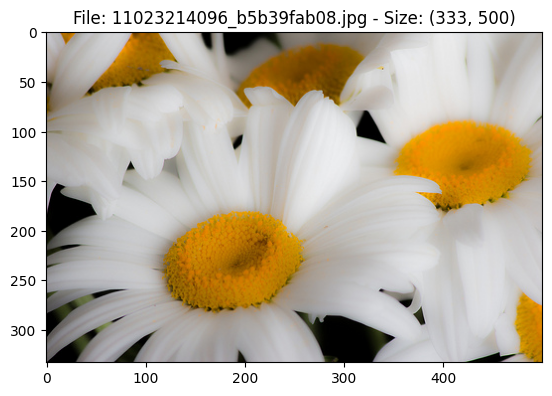

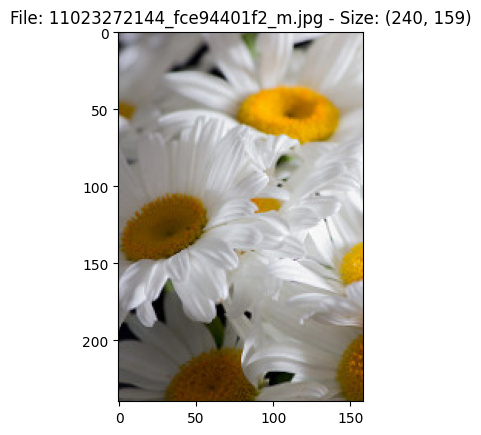

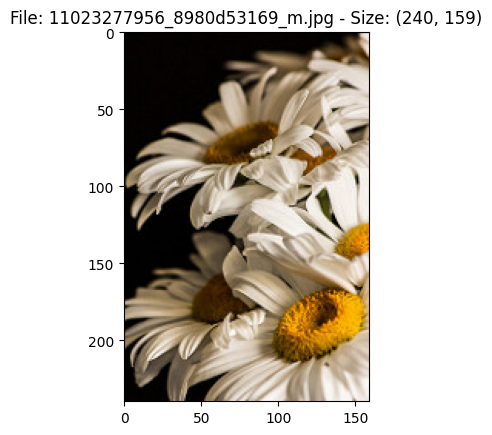

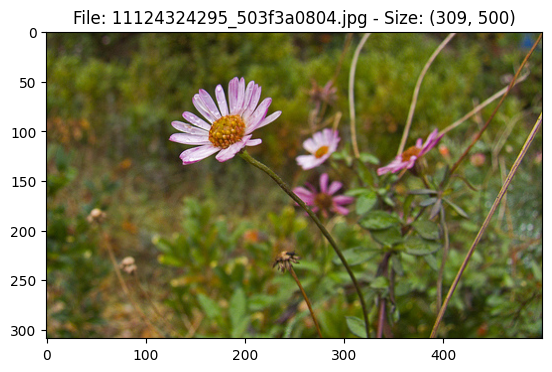

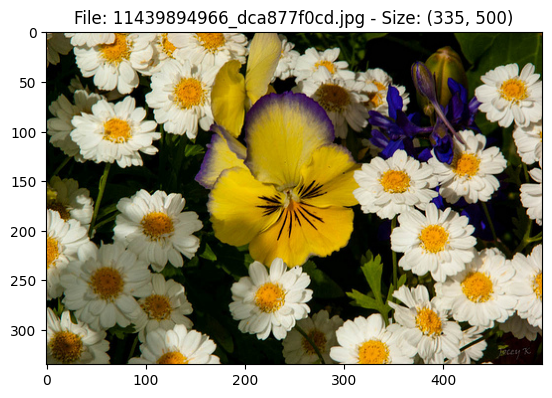

array([[[203, 199, 198],
        [202, 197, 198],
        [199, 194, 196],
        ...,
        [174, 179, 182],
        [170, 177, 180],
        [168, 177, 181]],

       [[205, 201, 200],
        [204, 198, 199],
        [202, 195, 198],
        ...,
        [173, 178, 181],
        [170, 176, 181],
        [170, 176, 181]],

       [[205, 200, 201],
        [205, 199, 200],
        [203, 196, 199],
        ...,
        [171, 177, 182],
        [170, 176, 181],
        [171, 177, 182]],

       ...,

       [[ 94,  93,  97],
        [ 97,  96, 100],
        [101,  96, 105],
        ...,
        [  0, 125, 186],
        [  1, 125, 185],
        [  2, 117, 178]],

       [[ 96,  92,  97],
        [103,  99, 105],
        [ 57,  53,  59],
        ...,
        [  1, 127, 186],
        [  4, 126, 186],
        [  6, 120, 183]],

       [[ 96,  90,  95],
        [ 53,  48,  57],
        [  2,   0,   3],
        ...,
        [  0, 123, 181],
        [  0, 122, 178],
        [  2, 119, 174]]

In [2]:
# Define the path to the images
codespace_path = os.path.abspath('..')
image_folder = os.path.join(codespace_path, 'data', 'raw', 'train',  'daisy')
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')][20:25]

# Load and display the first 5 images
images = []
for i, image_file in enumerate(image_files):
    if i >= 5:
        break
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    image_size = image.shape[:2]
    images.append(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"File: {image_file} - Size: {image_size}")
    plt.show()
print(repr(images[0]))

## Test color channel extraction

In [3]:
np.random.seed(0)
random_img = np.random.randint(0, 255, (4, 4, 3), dtype=np.uint8)
print(random_img)
random_img_red = random_img[:, :, 0]
random_img_green = random_img[:, :, 1]
random_img_blue = random_img[:, :, 2]

[[[172  10 127]
  [140  47 170]
  [196 151 117]
  [166  22 183]]

 [[192 204  33]
  [216  67 179]
  [ 78 154 251]
  [ 82 162 219]]

 [[195 118 125]
  [139 103 125]
  [229 216   9]
  [164 116 108]]

 [[211 222 161]
  [159  21  81]
  [ 89 165 242]
  [214 102  98]]]


## Isolate the red, green, and blue channels

How to read:
- First column in original image: red channel
- Second column: green channel
- Third column: blue channel

In [4]:
random_img_red = random_img[:, :, 0]
print(random_img_red)
random_img_green = random_img[:, :, 1]
print(random_img_green)
random_img_blue = random_img[:, :, 2]
print(random_img_blue)

[[172 140 196 166]
 [192 216  78  82]
 [195 139 229 164]
 [211 159  89 214]]
[[ 10  47 151  22]
 [204  67 154 162]
 [118 103 216 116]
 [222  21 165 102]]
[[127 170 117 183]
 [ 33 179 251 219]
 [125 125   9 108]
 [161  81 242  98]]


## Get the kernel used above

In [5]:
kernel_1D = cv2.getGaussianKernel(3, 1)
print("1D Kernel: ", kernel_1D)
kernel_2D = np.outer(kernel_1D, kernel_1D)
print("2D Kernel: ", kernel_2D)

1D Kernel:  [[0.27406862]
 [0.45186276]
 [0.27406862]]
2D Kernel:  [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


## Progressive blurring with $k = 2^{1/3}$

### First, we look at th original images

In [6]:
from src.utils import ImageProcessor, ImageFeatureExtractor
image = images[0]
s = 5
octave_range = s + 3
k = 2**(1/s)
current_sigma = 1.6
gaussian_images = [ImageProcessor.gaussian_blurr(image, sigma=current_sigma * (k**i)) for i in range(s+3)]


#for i in range(len(gaussian_images)):
#    plt.imshow(cv2.cvtColor(gaussian_images[i], cv2.COLOR_BGR2RGB))
#    plt.title(f"Gaussian Image {i}")
#    plt.show()

Error in Logging Configuration: [Errno 2] No such file or directory: 'res/logging_config.yaml'


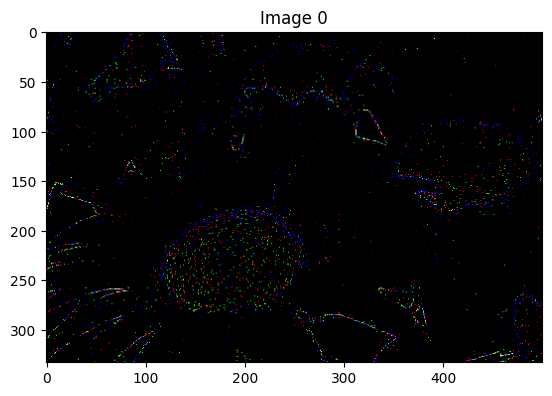

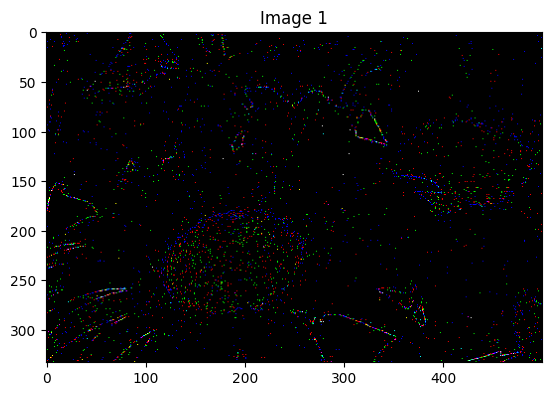

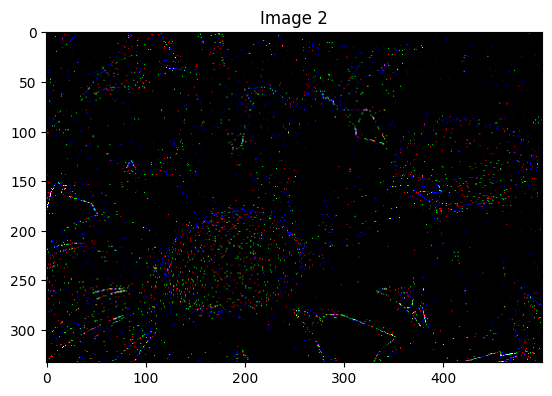

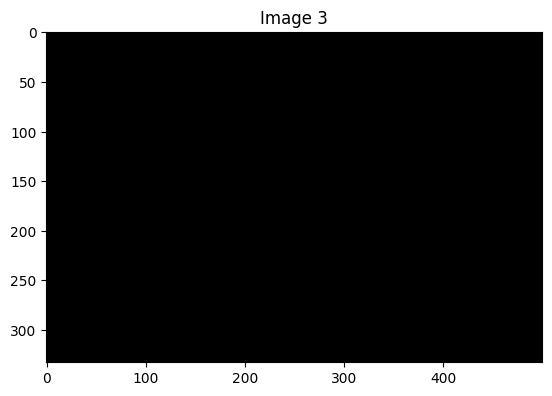

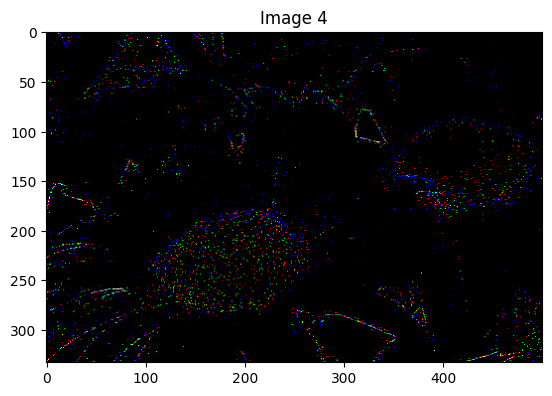

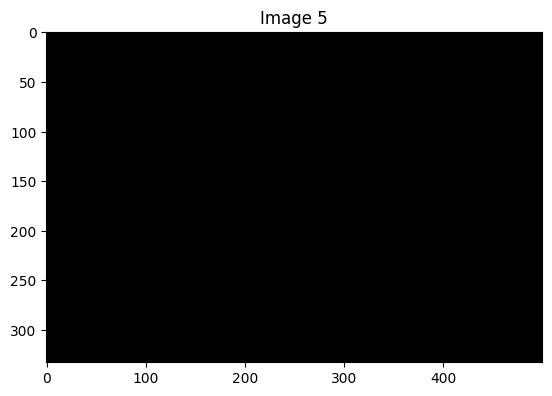

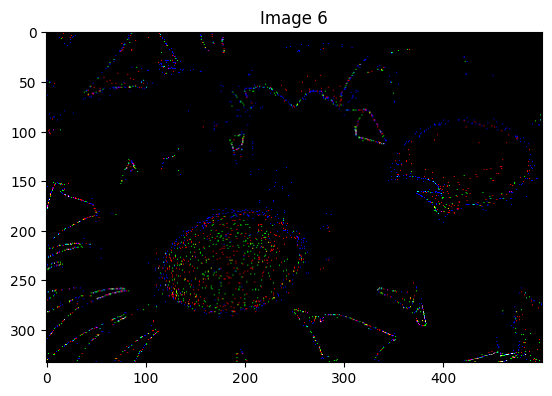

In [7]:
from src.utils import ImageProcessor, ImageFeatureExtractor

octaves_diff = []
for i in range(len(gaussian_images)-1):
    dog = gaussian_images[i+1] - gaussian_images[i]
    octaves_diff.append(dog)
    
for i in range(len(octaves_diff)):
    plt.imshow(cv2.cvtColor(octaves_diff[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i}")
    plt.show()
    
# Check

### By looking at the difference between the images, we can see invariant features that stay there even after blurring multiple times

- Interestingly, the invariant points are located on the flower petals and the center of the flower. This indicates that 
it is possible to use them not only as keypoints but also to draw boundaries around the flower.

Below, the difference_of_gaussian method of ImageFeatureExtractor is used to get the same result.

2024-09-27 12:19:37,703 - Image_Feature_Extractor - INFO - 
            Calculating DoG for octave 0 with 5 intervals and sigma=1.6:
            

            
2024-09-27 12:19:37,712 - Image_Feature_Extractor - INFO - 
            Calculating DoG for octave 1 with 5 intervals and sigma=1.6:
            

            


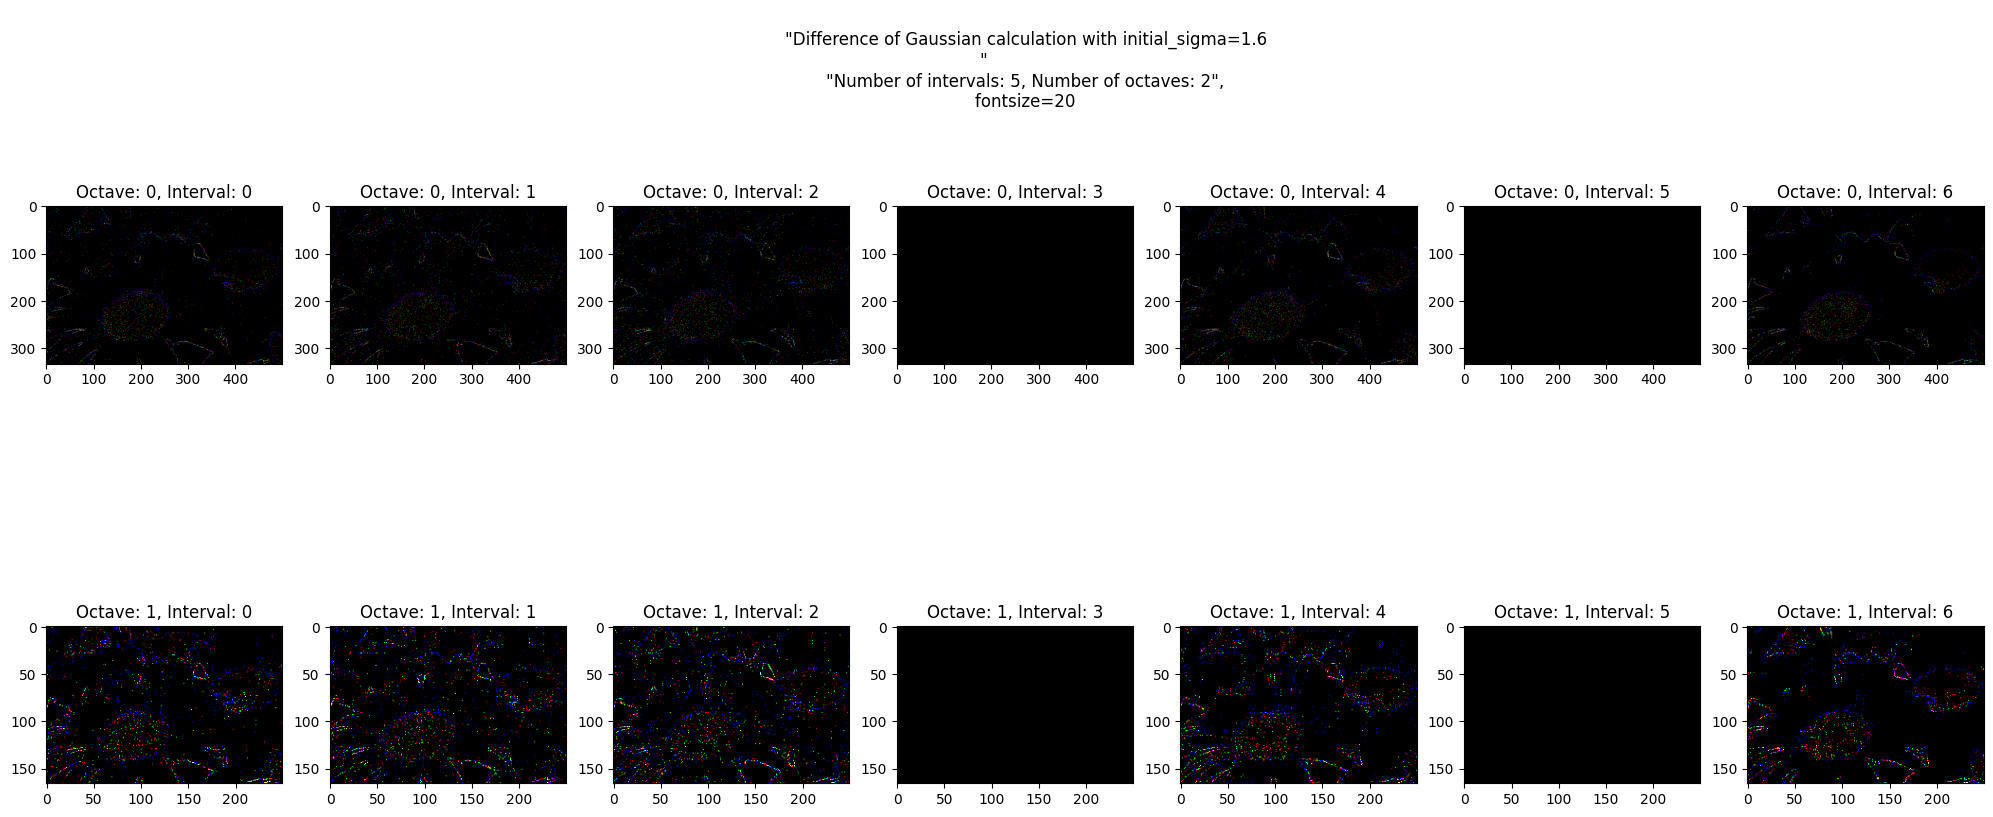

In [8]:
# Use the difference_of_gaussian method of ImageFeatureExtractor to get the same result
octave_diff_ife = ImageFeatureExtractor.difference_of_gaussian(image, 
                                                               5,
                                                               2,
                                                               plot=True)

## Some images seem to be completely black. 

By running the code below, we can see that the images are completely black (difference = 0)

In [9]:
for i, image in enumerate(octave_diff_ife):
    print(f"Image {i} - Max: {image.max()} - Min: {image.min()}")

Image 0 - Max: 255 - Min: 0
Image 1 - Max: 255 - Min: 0
Image 2 - Max: 255 - Min: 0
Image 3 - Max: 0 - Min: 0
Image 4 - Max: 255 - Min: 0
Image 5 - Max: 0 - Min: 0
Image 6 - Max: 255 - Min: 0
Image 7 - Max: 255 - Min: 0
Image 8 - Max: 255 - Min: 0
Image 9 - Max: 255 - Min: 0
Image 10 - Max: 0 - Min: 0
Image 11 - Max: 255 - Min: 0
Image 12 - Max: 0 - Min: 0
Image 13 - Max: 255 - Min: 0


## Use the SIFT algorithm provided by OpenCV to extract keypoints and descriptors

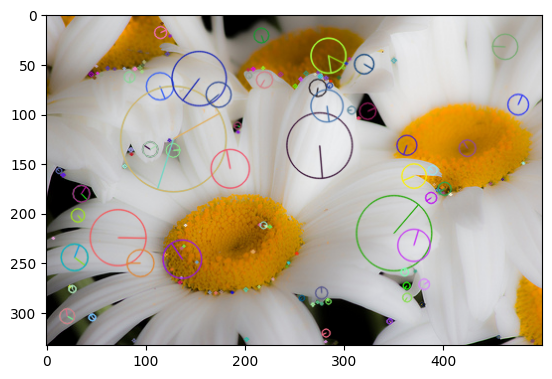

In [10]:
image = images[0]
keypoint, descriptor = ImageFeatureExtractor.sift(image)
img = cv2.drawKeypoints(image, keypoint, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## Print out the keypoints

In [11]:
from collections import defaultdict
from src.utils import convert_to_integers, get_non_zero_pixel_indices, is_subset
kp_descriptor = defaultdict(lambda: {
  "Coordinates": None,
    "Size": None,
    "Angle": None,
    "Response": None,
    "Octave": None,
    "Class ID": None
})
kp_coords = []
for i, kp in enumerate(keypoint):
    kp_descriptor[i]["Coordinates"] = kp.pt
    kp_descriptor[i]["Size"] = kp.size
    kp_descriptor[i]["Angle"] = kp.angle
    kp_descriptor[i]["Response"] = kp.response
    kp_descriptor[i]["Octave"] = kp.octave
    kp_descriptor[i]["Class ID"] = kp.class_id
    kp_coords.append(kp.pt)
    
kp_coords = convert_to_integers(kp_coords)
print("Number of keypoints: ", len(kp_coords))
print("Keypoints coordinates, converted to integers: ", kp_coords)
for i in range(len(kp_descriptor)):
    print(f"""
    =======================================
    KeyPoint {i}:
    Coordinates: {kp_descriptor[i]["Coordinates"]}
    Size: {kp_descriptor[i]["Size"]}
    Angle: {kp_descriptor[i]["Angle"]}
    Response: {kp_descriptor[i]["Response"]}
    Octave: {kp_descriptor[i]["Octave"]}
    Class ID: {kp_descriptor[i]["Class ID"]}
    =======================================
    """)


Number of keypoints:  168
Keypoints coordinates, converted to integers:  [(6, 224), (12, 157), (16, 161), (16, 161), (20, 303), (20, 303), (23, 274), (26, 276), (26, 276), (28, 244), (28, 244), (31, 202), (35, 180), (35, 180), (45, 60), (46, 304), (46, 304), (48, 63), (50, 51), (51, 58), (54, 60), (61, 53), (68, 54), (72, 224), (78, 54), (79, 152), (79, 152), (83, 62), (85, 136), (85, 136), (85, 140), (88, 328), (89, 54), (94, 53), (94, 53), (94, 250), (96, 57), (97, 50), (98, 47), (104, 135), (104, 135), (114, 72), (115, 18), (116, 9), (119, 241), (121, 39), (124, 126), (124, 21), (126, 256), (126, 256), (127, 136), (127, 136), (127, 125), (127, 125), (134, 269), (135, 264), (136, 235), (136, 235), (136, 246), (138, 232), (138, 232), (140, 211), (151, 249), (153, 64), (164, 279), (170, 280), (170, 280), (173, 80), (176, 279), (185, 155), (187, 279), (192, 112), (192, 112), (193, 118), (201, 276), (201, 326), (203, 55), (204, 61), (208, 238), (208, 238), (208, 54), (214, 274), (215, 21

## Now, we will check whether the coordinates obtained from the gaussian bluring are contained in the keypoints

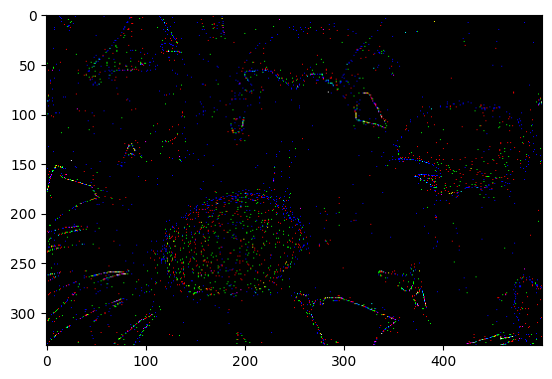

In [12]:
octave_diff_img_0 = octave_diff_ife[0]
octave_diff_img_1 = octave_diff_ife[1]
plt.imshow(cv2.cvtColor(octave_diff_img_0, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
non_zero_indices_img_0 = get_non_zero_pixel_indices(octave_diff_img_0)
non_zero_indices_0 = convert_to_integers(non_zero_indices_img_0)
non_zero_indices_img_1 = get_non_zero_pixel_indices(octave_diff_img_1)
non_zero_indices_1 = convert_to_integers(non_zero_indices_img_1)
print("Non-zero indices: ", non_zero_indices_0)
print("Check if non-zero indices are in the keypoints: ", is_subset(non_zero_indices_0, non_zero_indices_1))

Non-zero indices:  [(0, 10), (0, 14), (0, 29), (0, 86), (0, 89), (0, 90), (0, 110), (0, 118), (0, 128), (0, 154), (0, 155), (0, 156), (0, 164), (0, 177), (0, 178), (0, 179), (1, 12), (1, 15), (1, 28), (1, 86), (1, 88), (1, 94), (1, 108), (1, 109), (1, 113), (1, 114), (1, 154), (1, 176), (1, 383), (2, 13), (2, 21), (2, 24), (2, 27), (2, 28), (2, 29), (2, 58), (2, 87), (2, 103), (2, 113), (2, 114), (2, 164), (2, 168), (2, 177), (2, 179), (3, 14), (3, 16), (3, 23), (3, 84), (3, 85), (3, 86), (3, 97), (3, 115), (3, 127), (3, 164), (3, 179), (4, 7), (4, 15), (4, 16), (4, 84), (4, 86), (4, 94), (4, 177), (4, 342), (5, 17), (5, 22), (5, 25), (5, 29), (5, 116), (5, 118), (5, 156), (5, 157), (5, 235), (5, 337), (6, 25), (6, 85), (6, 115), (6, 117), (6, 179), (7, 15), (7, 23), (7, 25), (7, 29), (7, 82), (7, 84), (7, 115), (7, 116), (7, 121), (7, 147), (7, 165), (7, 178), (7, 211), (7, 226), (7, 342), (7, 391), (8, 14), (8, 24), (8, 77), (8, 81), (8, 82), (8, 84), (8, 119), (8, 120), (8, 129), (8

## The descriptor is a 128-dimensional vector. The image above has 274 keypoints and descriptors.

In [14]:
print(type(keypoint))

<class 'tuple'>


## VLAD

In the example below, it can be seen that when using power norm, some vectors might be normalized to zero if their L2 Norm is small enough.

2024-09-27 12:20:48,417 - VLAD_Vector - INFO - Resulting VLAD vector: [ 0.         -0.08311716 -0.09934401 ...  0.          0.
  0.        ]. Shape of vector: (2048,)
2024-09-27 12:20:48,462 - VLAD_Vector - INFO - Resulting VLAD vector: [-0.12280111  0.          0.         ...  0.04845016 -0.04845016
  0.04845016]. Shape of vector: (2048,)


Keypoints data:
Number of keypoints: 
 168 
Keypoint angles: 
 [59.624542236328125, 217.4820098876953, 26.25042724609375, 311.2344970703125, 29.5211181640625, 260.889892578125, 248.99717712402344, 47.037109375, 263.49957275390625, 37.00555419921875, 290.8128662109375, 51.9979248046875, 46.505859375, 302.92047119140625, 228.95240783691406, 40.138031005859375, 246.3618927001953, 58.27960205078125, 227.9658203125, 52.457000732421875, 61.249969482421875, 80.5782470703125, 81.69876098632812, 0.826080322265625, 82.45770263671875, 114.905029296875, 193.72052001953125, 82.60662841796875, 201.35867309570312, 332.5264587402344, 78.64471435546875, 23.0521240234375, 117.02914428710938, 82.86074829101562, 112.71644592285156, 179.9407196044922, 75.42825317382812, 332.3259582519531, 66.57614135742188, 212.90975952148438, 328.8011474609375, 68.17816162109375, 335.205322265625, 327.03558349609375, 149.4990692138672, 287.93450927734375, 252.11172485351562, 322.38531494140625, 151.7938232421875, 349.2159

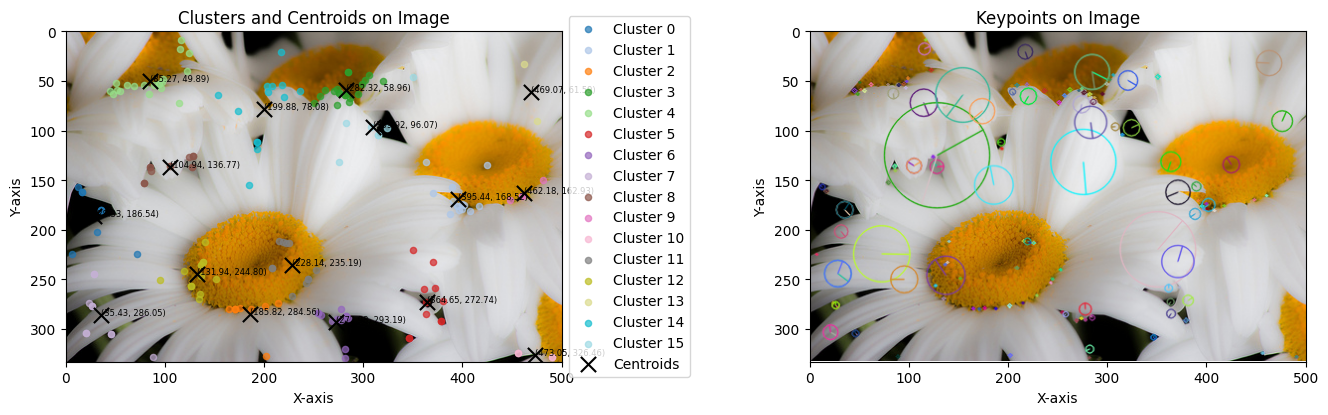

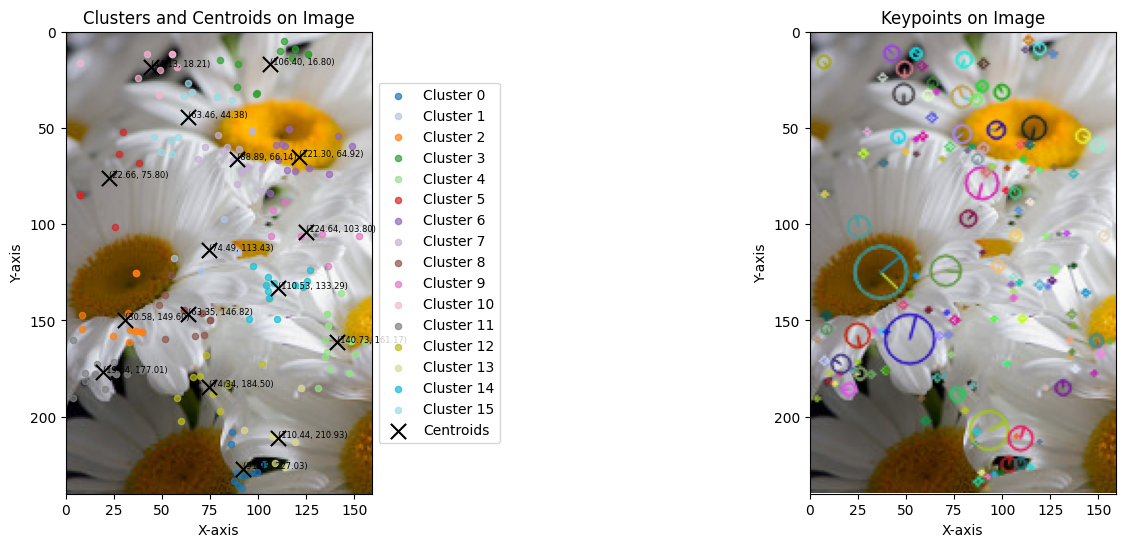

In [29]:
from src.metrics import VLAD
from src.utils import plot_clusters_on_image

image_0 = images[0]
image_1 = images[1]

vlad_0 = VLAD(image_0, flatten=True, verbose=True)
vlad_1 = VLAD(image_1 , flatten=True, verbose=True)
plot_clusters_on_image(image_0,
                       vlad_0.keypoints_2d_coords,
                       vlad_0.keypoints_2d_coords_centroids,
                       vlad_0.keypoints_labels,
                       keypoints=vlad_0.keypoints,
                       show_centroid_coords=True
)
plot_clusters_on_image(image_1,
                       vlad_1.keypoints_2d_coords,
                       vlad_1.keypoints_2d_coords_centroids,
                       vlad_1.keypoints_labels,
                       keypoints=vlad_1.keypoints,
                       show_centroid_coords=True
)


## Test again. This time, power norm is set to zero.

Even without power norm (power_norm_weight = 0), the result can still be normalized to zero.

2024-09-27 12:20:21,467 - VLAD_Vector - INFO - Resulting VLAD vector: [-0.10976426  0.         -0.10976426 ...  0.          0.09245003
 -0.09245003]. Shape of vector: (2048,)
2024-09-27 12:20:21,520 - VLAD_Vector - INFO - Resulting VLAD vector: [ 0.          0.          0.         ...  0.          0.
 -0.13018891]. Shape of vector: (2048,)


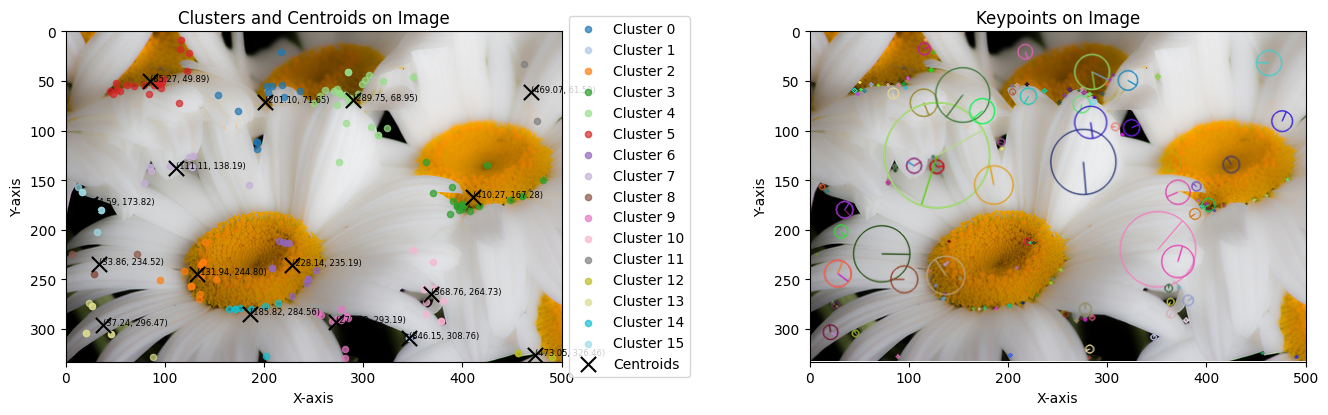

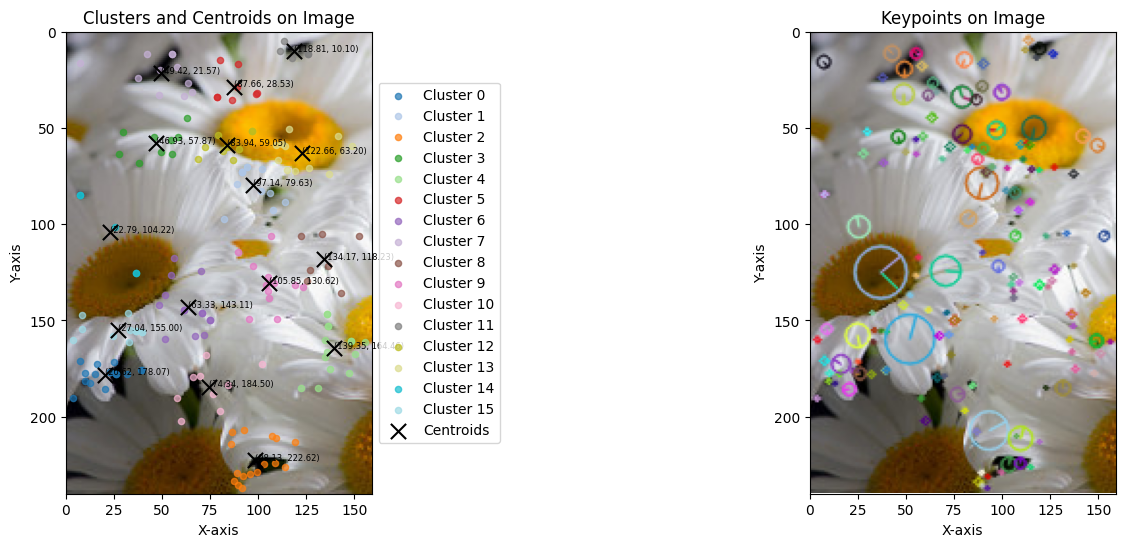

In [23]:
image_0 = images[0]
image_1 = images[1]

vlad_0 = VLAD(image_0, flatten=True, power_norm_weight=0)
vlad_1 = VLAD(image_1 , flatten=True, power_norm_weight=0)
plot_clusters_on_image(image_0,
                       vlad_0.keypoints_2d_coords,
                       vlad_0.keypoints_2d_coords_centroids,
                       vlad_0.keypoints_labels,
                       keypoints=vlad_0.keypoints,
                       show_centroid_coords=True
)
plot_clusters_on_image(image_1,
                       vlad_1.keypoints_2d_coords,
                       vlad_1.keypoints_2d_coords_centroids,
                       vlad_1.keypoints_labels,
                       keypoints=vlad_1.keypoints,
                       show_centroid_coords=True
)

## Validate that the circles that appear when calling cv2.drawKeypoints are the coordinates of the keypoints

We can see that the circles drawn by cv2.drawKeypoints and the ones using scatter plot overlap with each other (read documentation of plot_clusters_on_image method for more information).

2024-09-27 12:19:46,360 - VLAD_Vector - INFO - Resulting VLAD vector: [[-0.06801952 -0.03927109 -0.03206471 ... -0.0751984   0.05069875
   0.05069875]
 [ 0.          0.0549028  -0.07764429 ...  0.01941107  0.07764429
   0.11965789]
 [ 0.06306419  0.13584442 -0.0873843  ...  0.05640633  0.04369215
   0.07134898]
 ...
 [ 0.07954509  0.07954509 -0.10427114 ...  0.05584936  0.03776106
  -0.10596672]
 [ 0.12062838  0.07954    -0.01778568 ...  0.09411299  0.04356585
   0.0871317 ]
 [ 0.08657163  0.06612017 -0.05822745 ...  0.06876602 -0.01889148
   0.032721  ]]. Shape of vector: (16, 128)


Keypoints data:
Number of keypoints: 
 972 
Keypoint angles: 
 [148.81790161132812, 246.19168090820312, 229.7034912109375, 79.69638061523438, 254.47280883789062, 310.275390625, 226.70156860351562, 60.136474609375, 333.4382629394531, 28.262786865234375, 234.0435791015625, 289.5691223144531, 296.75640869140625, 121.84576416015625, 289.87872314453125, 16.892730712890625, 29.10992431640625, 319.27703857421875, 226.552001953125, 155.33645629882812, 313.4167785644531, 241.17636108398438, 232.4158172607422, 171.82411193847656, 38.55767822265625, 309.8397216796875, 85.80026245117188, 257.903564453125, 111.16119384765625, 31.5350341796875, 224.33998107910156, 315.4889831542969, 255.0677490234375, 313.8443603515625, 39.57012939453125, 112.63328552246094, 0.3590087890625, 247.87503051757812, 247.75747680664062, 240.84112548828125, 136.2227783203125, 108.95018005371094, 108.55905151367188, 33.838134765625, 227.37608337402344, 95.54013061523438, 48.20477294921875, 7.0389404296875, 96.05551147460938

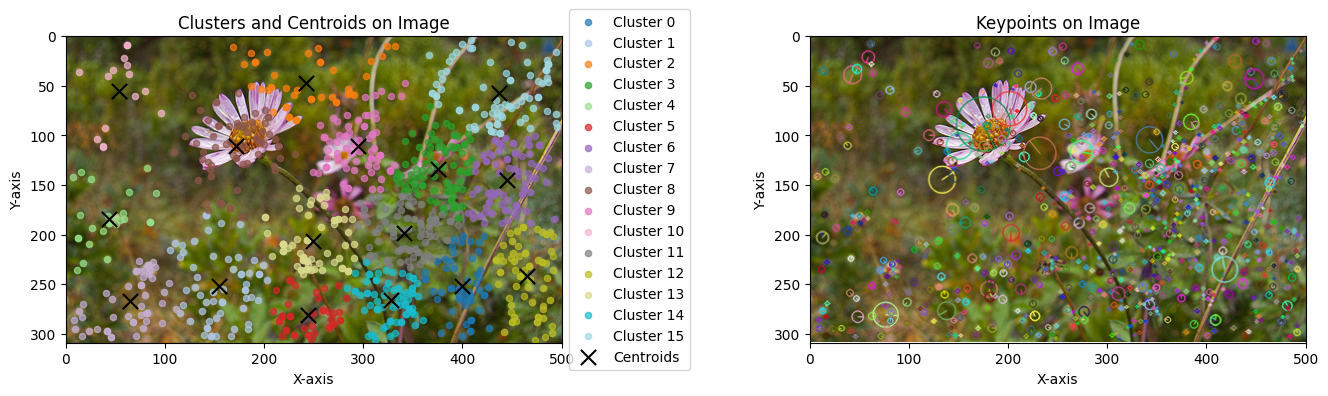

In [17]:
image_4 = images[3]
vlad_4 = VLAD(image_4, verbose=True)
keypoint_4, descriptor_4 = ImageFeatureExtractor.sift(image_4)
from src.utils import plot_clusters_on_image
plot_clusters_on_image(image_4,
                      vlad_4.keypoints_2d_coords, 
                      vlad_4.keypoints_2d_coords_centroids, 
                      vlad_4.keypoints_labels,
                      keypoints=keypoint_4)